In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve


In [2]:
#read the data set
df = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns',50)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [3]:
#shape of the data
df.shape

(8124, 23)

In [4]:
print(df['stalk-root'].unique())
df = df.replace(['?'],np.nan)
df

['e' 'c' 'b' 'r' '?']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l


In [5]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#check null values
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                   True
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [7]:
#count of null values
df.isna().sum()
#df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [8]:
df = df.drop(['stalk-root'], axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
#short summary for numeric data 
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
#check unique values in class column
df['class'].unique()

array(['p', 'e'], dtype=object)

In [12]:
#Count of the unique occurrences of ‘class’ column
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

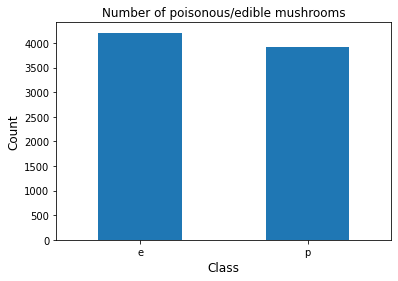

In [13]:
#count of edible and poisonous mushrooms
count = df['class'].value_counts()
count.plot(kind='bar')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.xticks(rotation=360)
plt.title('Number of poisonous/edible mushrooms')
plt.show()


In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g


In [15]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [16]:
#LabelEncoder converts each value in a column to a number
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,0,2,1,0,3,0,1


In [17]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

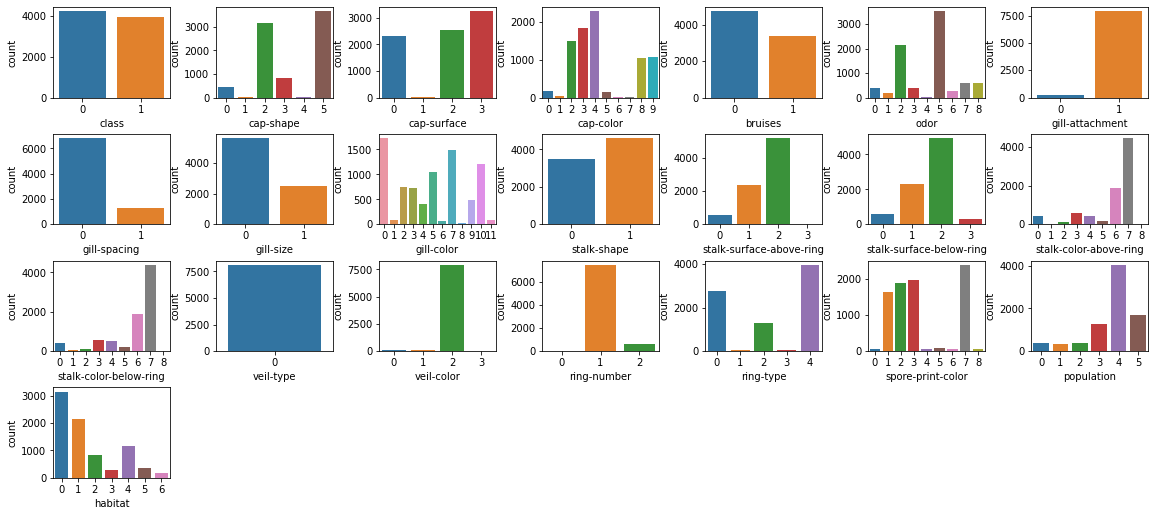

In [18]:
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(df.columns):
    figure.add_subplot(10, 7, i+1)
    sns.countplot(x = f"{c}", data=df)
    plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [19]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [20]:
df['veil-color'].value_counts()

2    7924
0      96
1      96
3       8
Name: veil-color, dtype: int64

In [21]:
df['gill-attachment'].value_counts()

1    7914
0     210
Name: gill-attachment, dtype: int64

In [22]:
df = df.drop(['veil-type','veil-color','gill-attachment'],axis=1)
print(df.shape)
df.head()

(8124, 19)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,2,2,7,7,1,0,3,0,1


In [23]:
#corelation
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,-0.348387,0.540024,-0.530566,-0.102019,-0.334593,-0.298801,-0.154003,-0.146730,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.013196,0.054050,-0.006039,0.063794,-0.030417,-0.032591,-0.031659,-0.030390,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.282306,0.208100,-0.161017,-0.014123,0.089090,0.107965,0.066050,0.068885,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.144259,-0.169464,0.084659,-0.456496,-0.060837,-0.047710,0.002364,0.008057,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,-0.299473,-0.369596,0.527120,0.099364,0.460824,0.458983,0.083538,0.092874,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,0.063936,0.310495,-0.129213,0.459766,0.118617,0.061820,0.174532,0.169407,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,1.000000,-0.108333,0.100193,0.080895,-0.212359,-0.213775,0.274574,0.253505,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,-0.108333,1.000000,-0.516736,0.214576,0.056310,0.010894,0.296548,0.278708,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,0.100193,-0.516736,1.000000,-0.175699,0.224287,0.257224,-0.058299,-0.074781,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,-0.102019,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.080895,0.214576,-0.175699,1.000000,0.015193,-0.034399,0.223439,0.235794,-0.293221,-0.291444,0.258831,0.087383,-0.269216


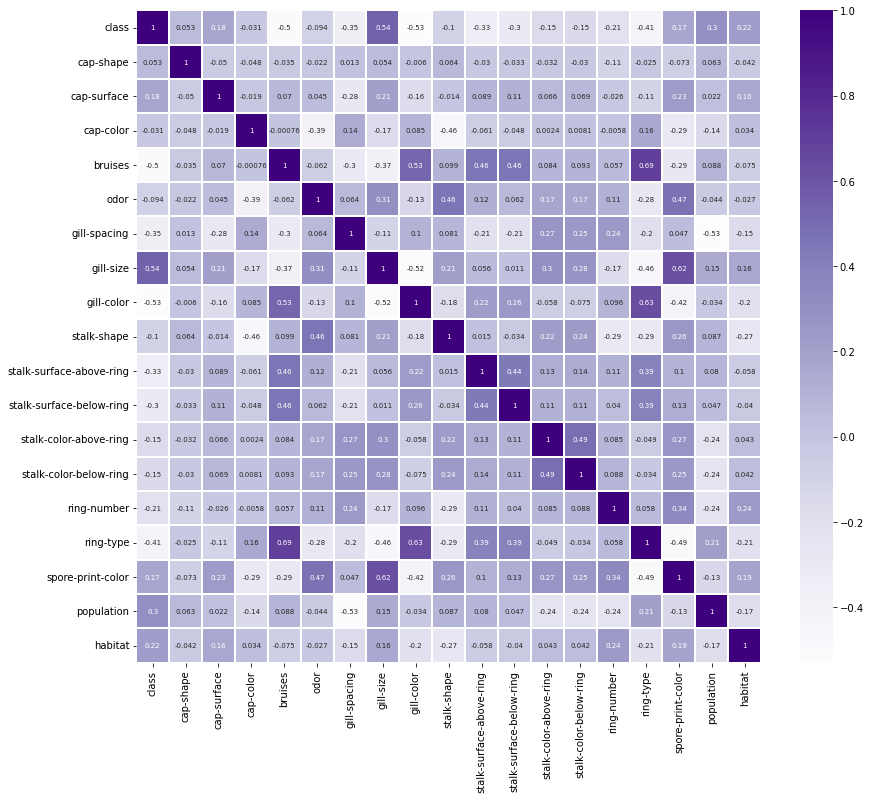

In [24]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [25]:
df.corr().min()

class                      -0.530566
cap-shape                  -0.106534
cap-surface                -0.282306
cap-color                  -0.456496
bruises                    -0.501530
odor                       -0.387121
gill-spacing               -0.529253
gill-size                  -0.516736
gill-color                 -0.530566
stalk-shape                -0.456496
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.240261
stalk-color-below-ring     -0.242792
ring-number                -0.293221
ring-type                  -0.487048
spore-print-color          -0.487048
population                 -0.529253
habitat                    -0.269216
dtype: float64

### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [26]:
df[['class', 'gill-color']].groupby(['gill-color'], 
as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


In [27]:
#using train test split
x = df.drop(['class'], axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Gaussian Naive Bayes

In [28]:
#gaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train, y_train)


y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,y_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,y_pred_test))     
print()

y_pred_nb = gnb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

train accuracy is: 0.9198338205877827
test accuracy is: 0.9187692307692308

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92       843
           1       0.95      0.88      0.91       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



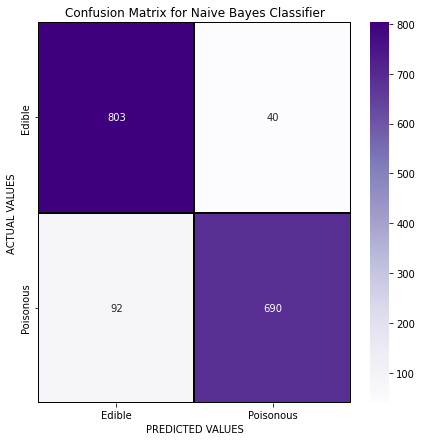

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Multinomial Naive Bayes

In [30]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)


mnb_pred_train = mnb.predict(x_train)
mnb_pred_test = mnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,mnb_pred_train))
print('train Recall:',metrics.recall_score(y_train,mnb_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,mnb_pred_test))     
print('test Recall:',metrics.recall_score(y_test,mnb_pred_test))
print()

y_pred_mnb = mnb.predict(x_test)
print("Naive Bayes Classifier report:TEST \n\n", classification_report(y_test, y_pred_mnb))

train accuracy is: 0.8093552854285274
train Recall: 0.6726228462029356
test accuracy is: 0.812923076923077
test Recall: 0.680306905370844

Naive Bayes Classifier report:TEST 

               precision    recall  f1-score   support

           0       0.76      0.94      0.84       843
           1       0.91      0.68      0.78       782

    accuracy                           0.81      1625
   macro avg       0.83      0.81      0.81      1625
weighted avg       0.83      0.81      0.81      1625



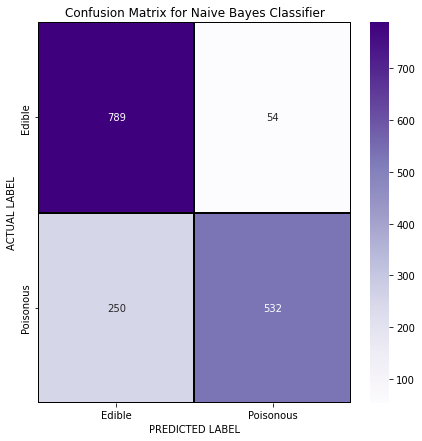

In [31]:
cm = confusion_matrix(y_test,y_pred_mnb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Bernoulli Naive Bayes

In [32]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)


bnb_pred_train = bnb.predict(x_train)
bnb_pred_test = bnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,bnb_pred_train))
print('train recall is:',metrics.recall_score(y_train,bnb_pred_train)) 

print()

y_pred_bnb = bnb.predict(x_test)
print("Naive Bayes Classifier report:TEST \n\n", classification_report(y_test, y_pred_bnb))

train accuracy is: 0.8687490383135867
train recall is: 0.7967453733248245

Naive Bayes Classifier report:TEST 

               precision    recall  f1-score   support

           0       0.82      0.92      0.87       843
           1       0.90      0.79      0.84       782

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625



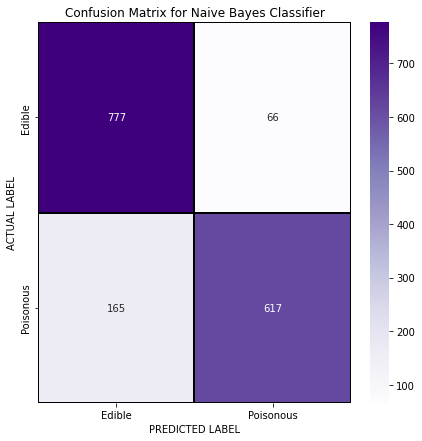

In [33]:
cm = confusion_matrix(y_test, y_pred_bnb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Logistic Regression

In [34]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))
print()

y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Test Accuracy: 93.97%

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



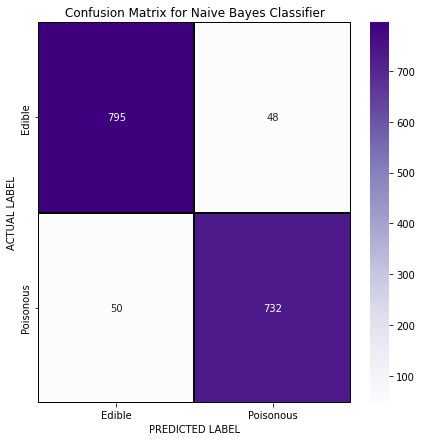

In [35]:
cm = confusion_matrix(y_test,y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))
print()

y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Test Accuracy: 100.0%

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



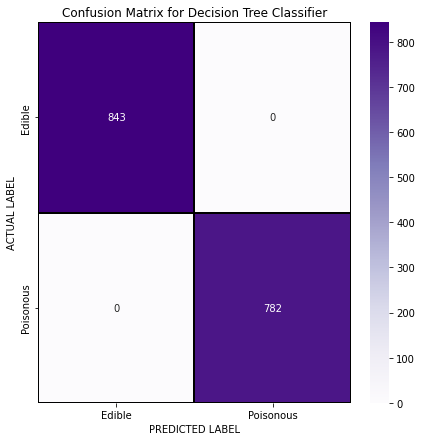

In [38]:
cm = confusion_matrix(y_test,y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


# AUC-ROC Curve

In [39]:
#area under the curve AUC
#receiver operating characteristic curve ROC

from sklearn.metrics import roc_curve, auc

fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

fpr_mnb, tpr_mnb, threshold_mnb = roc_curve(y_test, y_pred_mnb)
roc_auc_mnb = auc(fpr_mnb,tpr_mnb)

fpr_bnb, tpr_bnb, threshold_bnb = roc_curve(y_test, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb,tpr_bnb)

fpr_l, tpr_l, threshold_l = roc_curve(y_test, y_pred_lr)
roc_auc_l = auc(fpr_l,tpr_l)

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

<IPython.core.display.Javascript object>


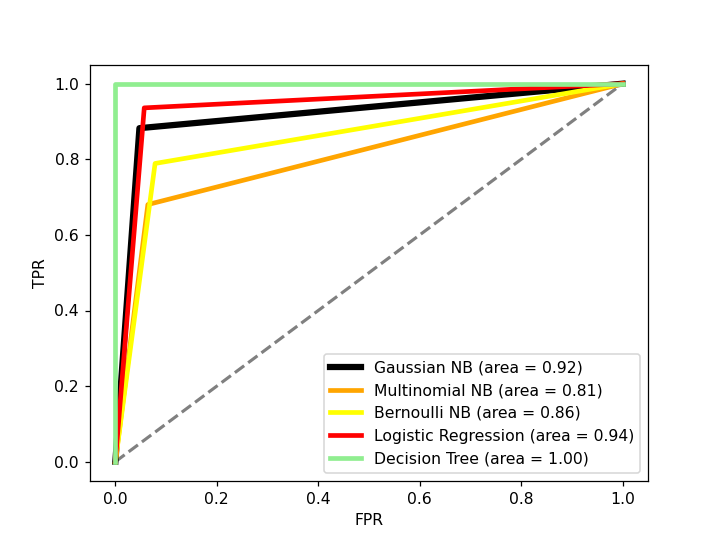

In [40]:
%matplotlib notebook

plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.plot(fpr_nb, tpr_nb, color='black', lw=4, label='Gaussian NB (area = %0.2f)'%roc_auc_nb)         # gaussian nb
plt.plot(fpr_mnb, tpr_mnb, color='orange', lw=3, label='Multinomial NB (area = %0.2f)'%roc_auc_mnb)  # multinomial nb
plt.plot(fpr_bnb, tpr_bnb, color='yellow', lw=3, label='Bernoulli NB (area = %0.2f)'%roc_auc_bnb)    # bernoulli nb
plt.plot(fpr_l, tpr_l, color='red', lw=3, label='Logistic Regression (area = %0.2f)'%roc_auc_l)      # logistic regression
plt.plot(fpr_dt, tpr_dt, color='lightgreen', lw=3, label='Decision Tree (area = %0.2f)'%roc_auc_dt)  # Decision Tree


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')

# Predictions

using decision tree classifier model since it has the best accuracy and precision. <br>
why precision? Because in this problem, precision is the error metrics we want to focus on. So reducing False-Positive increase precision. <br>
False positive here refers to actual being poisonous but predicts edible which can bad.

In [45]:
y_predictions = dt.predict(x_test)

print(y_predictions[222:243])
print(y_test[222:243].values)

[0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1]
[0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1]


In [46]:
y_actual = np.array(y_test)
actual = []
for i in range(len(y_actual)):
    if y_actual[i] == 0:
        actual.append('Edible')
    else:
        actual.append('Poisonous')


In [47]:
predictions = []
for i in range(len(y_predictions)):
    if y_predictions[i] == 0:
        predictions.append('Edible')
    else:
        predictions.append('Poisonous')

In [48]:
results = pd.DataFrame({'Actual': actual[222:243], 'Predicted': predictions[222:243]})
results

,Actual,Predicted
0,Edible,Edible
1,Edible,Edible
2,Edible,Edible
3,Edible,Edible
4,Edible,Edible
5,Edible,Edible
6,Poisonous,Poisonous
7,Poisonous,Poisonous
8,Poisonous,Poisonous
9,Edible,Edible
